<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> Inclass - Lab File 3 <br>(Week 2 - Day 2)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information:

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Regularization](#reg)**
4. **[Grid Search](#gs)**

**Import the required libraries**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from statsmodels.api import OLS, add_constant
from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error

#### Load the Life expectancy dataset and display the first five records

In [2]:
df=pd.read_csv("/content/Life_Expectancy.csv")
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [3]:
df.shape

(182, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df["Life_Expectancy"].isnull().sum()

9

In [6]:
df["Life_Expectancy"].skew()

-0.5570055450291043

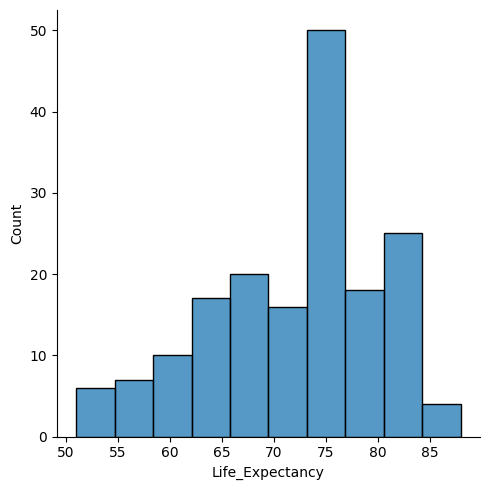

In [7]:
sns.displot(df["Life_Expectancy"])

In [8]:
df["Life_Expectancy"].fillna(df['Life_Expectancy'].median())

0      65.0
1      77.8
2      75.6
3      52.4
4      76.4
       ... 
177    74.1
178    76.0
179    65.7
180    61.8
181    67.0
Name: Life_Expectancy, Length: 182, dtype: float64

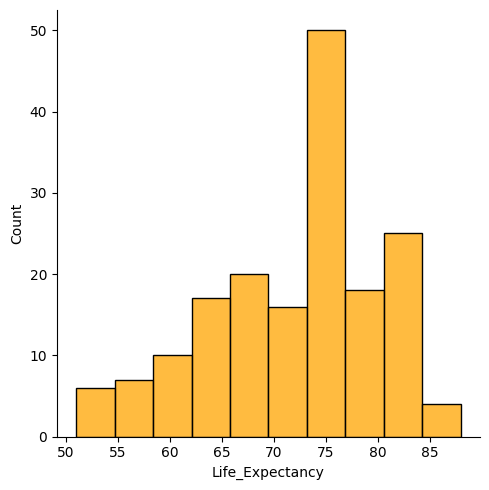

In [9]:
sns.displot(df["Life_Expectancy"],color="orange")

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
(df.isnull().sum()/df.shape[0])*100

Country               0.000000
Year                  0.000000
Status                0.000000
Adult_Mortality       4.945055
Infant_Deaths         0.000000
Alcohol              91.758242
Hepatitis B           4.945055
Measles               0.000000
BMI                   2.197802
Underfive_Deaths      0.000000
Polio                 0.000000
Diphtheria            0.000000
HIV                   0.000000
GDP                  13.736264
Population           22.527473
Malnourished10_19     2.197802
Malnourished5_9       2.197802
Income_Index          7.142857
Schooling             4.945055
Life_Expectancy       4.945055
dtype: float64

In [11]:
df.drop("Alcohol", axis=1,inplace=True)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
df.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Hepatitis B', 'Measles ', 'BMI', 'Underfive_Deaths ', 'Polio',
       'Diphtheria ', 'HIV', 'GDP', 'Population', 'Malnourished10_19',
       'Malnourished5_9', 'Income_Index', 'Schooling', 'Life_Expectancy'],
      dtype='object')

In [13]:
df.select_dtypes(include=np.number).fillna(df.median)

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,2015,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2015,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.22783,28873.0,1.2,1.3,0.762,14.2,77.8
2,2015,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.76292,39871528.0,6.0,5.8,0.743,14.4,75.6
3,2015,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,2015,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.9541,<bound method NDFrame._add_numeric_operations....,3.3,3.3,0.784,13.9,76.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2015,157.0,9,87.0,0,62.1,10,87,87,0.1,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....,1.6,1.5,0.769,14.3,74.1
178,2015,127.0,28,97.0,256,17.5,35,97,97,0.1,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....,14.2,14.5,0.678,12.6,76.0
179,2015,224.0,37,69.0,468,41.3,47,63,69,0.1,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....,13.6,13.4,0.499,9.0,65.7
180,2015,33.0,27,9.0,9,23.4,40,9,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,61.8


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
dummy_df = pd.get_dummies(df, columns=['Status'], drop_first=True)
dummy_df

,Country,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_Developing
0,Afghanistan,2015,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,1
1,Albania,2015,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8,1
2,Algeria,2015,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6,1
3,Angola,2015,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4,1
4,Antigua,2015,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Venezuela,2015,157.0,9,87.0,0,62.1,10,87,87,0.1,NaN,NaN,1.6,1.5,0.769,14.3,74.1,1
178,Viet Nam,2015,127.0,28,97.0,256,17.5,35,97,97,0.1,NaN,NaN,14.2,14.5,0.678,12.6,76.0,1
179,Yemen,2015,224.0,37,69.0,468,41.3,47,63,69,0.1,NaN,NaN,13.6,13.4,0.499,9.0,65.7,1
180,Zambia,2015,33.0,27,9.0,9,23.4,40,9,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,61.8,1


In [16]:
dummy_df.drop('Country',axis=1,inplace=True)

In [17]:
dummy_df.head()

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_Developing
0,2015,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,1
1,2015,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8,1
2,2015,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6,1
3,2015,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4,1
4,2015,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4,1


In [18]:
dummy_df.select_dtypes(include=np.number).fillna(dummy_df.median)

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_Developing
0,2015,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1,65.0,1
1,2015,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.22783,28873.0,1.2,1.3,0.762,14.2,77.8,1
2,2015,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.76292,39871528.0,6.0,5.8,0.743,14.4,75.6,1
3,2015,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4,1
4,2015,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.9541,<bound method NDFrame._add_numeric_operations....,3.3,3.3,0.784,13.9,76.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2015,157.0,9,87.0,0,62.1,10,87,87,0.1,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....,1.6,1.5,0.769,14.3,74.1,1
178,2015,127.0,28,97.0,256,17.5,35,97,97,0.1,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....,14.2,14.5,0.678,12.6,76.0,1
179,2015,224.0,37,69.0,468,41.3,47,63,69,0.1,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....,13.6,13.4,0.499,9.0,65.7,1
180,2015,33.0,27,9.0,9,23.4,40,9,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,61.8,1


In [24]:
(((dummy_df.isnull().sum()/dummy_df.shape[0])*100).sort_values())

Year                  0.000000
HIV                   0.000000
Polio                 0.000000
Underfive_Deaths      0.000000
Diphtheria            0.000000
Infant_Deaths         0.000000
Measles               0.000000
Status_Developing     0.000000
BMI                   2.197802
Malnourished10_19     2.197802
Malnourished5_9       2.197802
Hepatitis B           4.945055
Life_Expectancy       4.945055
Adult_Mortality       4.945055
Schooling             4.945055
Income_Index          7.142857
GDP                  13.736264
Population           22.527473
dtype: float64

In [28]:
null_percentage=(dummy_df.isnull().mean() * 100).round(2)

In [37]:
null_percentage_df = pd.DataFrame({'Column': null_percentage.index, 'Null Percentage': null_percentage.values})
null_percentage_df

,Column,Null Percentage
0,Year,0.00
1,Adult_Mortality,4.95
2,Infant_Deaths,0.00
3,Hepatitis B,4.95
4,Measles,0.00
5,BMI,2.20
6,Underfive_Deaths,0.00
7,Polio,0.00
8,Diphtheria,0.00
9,HIV,0.00


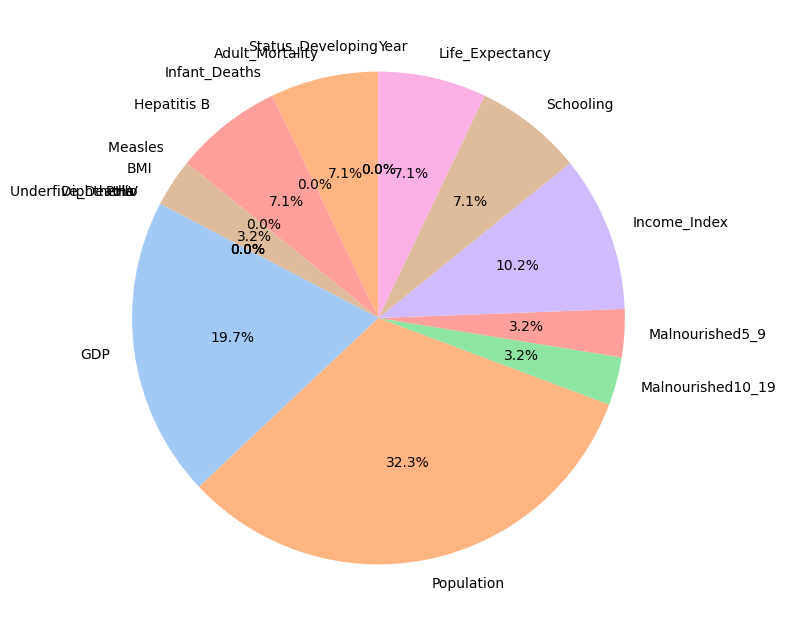

In [39]:
plt.figure(figsize=(8, 8))
plt.pie(null_percentage_df['Null Percentage'], labels=null_percentage_df['Column'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.show()

In [41]:
df_median_filled = dummy_df.fillna(df.median())

<ipython-input-41-580a543d6ba1>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_median_filled = dummy_df.fillna(df.median())


In [44]:
null_percentage=(df_median_filled.isnull().mean() * 100).round(2)
null_percentage_df = pd.DataFrame({'Column': null_percentage.index, 'Null Percentage': null_percentage.values})
null_percentage_df


,Column,Null Percentage
0,Year,0.0
1,Adult_Mortality,0.0
2,Infant_Deaths,0.0
3,Hepatitis B,0.0
4,Measles,0.0
5,BMI,0.0
6,Underfive_Deaths,0.0
7,Polio,0.0
8,Diphtheria,0.0
9,HIV,0.0


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [51]:
X=df_median_filled.drop("Life_Expectancy",axis=1)
y=df_median_filled["Life_Expectancy"]
model=OLS(y,add_constant(X)).fit()

In [55]:
df=df_median_filled

In [52]:
model.resid

0      5.600686
1      0.830237
2     -1.305769
3     -6.926331
4     -2.162341
         ...   
177   -0.613035
178    4.606810
179    3.164677
180   -3.467197
181    7.615939
Length: 182, dtype: float64

In [53]:
het_breuschpagan(model.resid, add_constant(X))

(24.214522495141974,
 0.11372246491762833,
 1.4804843043119635,
 0.10740383901880239)

p_value is > hence failed to reject null  hypothesis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
df.columns

Index(['Year', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis B', 'Measles ',
       'BMI', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', 'HIV', 'GDP',
       'Population', 'Malnourished10_19', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Life_Expectancy', 'Status_Developing'],
      dtype='object')

In [57]:
X=df[['Hepatitis B','Polio','Diphtheria ']]
Y=df['Life_Expectancy']

In [58]:
OLS(y,add_constant(X)).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     75.00
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           4.33e-68
Time:                        15:20:00   Log-Likelihood:                -434.97
No. Observations:                 182   AIC:                             905.9
Df Residuals:                     164   BIC:                             963.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               243.2179   1031.973      0.236      0.814   -1794.449    2280.885
Year                 -0.0936      0.512     -0.183      0.855      -1.105       0.918
Adult_Mortality      -0.0233      0.003     -6.877      0.000      -0.030      -0.017
Infant_Deaths         0.1012      0.032      3.155      0.002       0.038       0.164
Hepatitis B           0.0408      0.021      1.966      0.051      -0.000       0.082
Measles           -8.672e-05   5.43e-05     -1.598      0.112      -0.000    2.04e-05
BMI                  -0.0131      0.013     -1.005      0.316      -0.039       0.013
Underfive_Deaths     -0.0731      0.023     -3.144      0.002      -0.119      -0.027
Polio                 0.0131      0.012      1.059      0.291      -0.011       0.038
Diphtheria           -0.0045      0.024     -0.188      0.851      -0.052       0.043
HIV                  -0.4904      0.218     -2.248      0.026      -0.921      -0.060
GDP               -5.514e-06   2.25e-05     -0.245      0.807      -5e-05     3.9e-05
Population          2.14e-09   9.58e-09      0.223      0.823   -1.68e-08     2.1e-08
Malnourished10_19    -0.1295      0.234     -0.554      0.580      -0.591       0.332
Malnourished5_9      -0.0752      0.231     -0.325      0.746      -0.532       0.382
Income_Index         30.9863      3.586      8.642      0.000      23.906      38.066
Schooling            -0.1518      0.134     -1.129      0.261      -0.417       0.114
Status_Developing    -1.1690      0.676     -1.730      0.085      -2.503       0.165
==============================================================================
Omnibus:                       12.057   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               22.138
Skew:                          -0.298   Prob(JB):                     1.56e-05
Kurtosis:                       4.602   Cond. No.                     1.37e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
X=df[['Malnourished10_19','Malnourished5_9']]
Y=df['Life_Expectancy']
model=OLS(y,add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     25.66
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.60e-10
Time:                        15:23:32   Log-Likelihood:                -609.67
No. Observations:                 182   AIC:                             1225.
Df Residuals:                     179   BIC:                             1235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.0391      0.753    100.941      0.000      74.553      77.526
Malnourished10_19    -0.3885      0.550     -0.706      0.481      -1.475       0.698
Malnourished5_9      -0.5109      0.539     -0.948      0.345      -1.575       0.553
==============================================================================
Omnibus:                        7.025   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.213
Skew:                          -0.486   Prob(JB):                       0.0272
Kurtosis:                       2.926   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model.params

const                76.039086
Malnourished10_19    -0.388501
Malnourished5_9      -0.510922
dtype: float64

IF Malnourished10_19 increases by 1 life_expectancy decreases by 0.3 <br>

IF Malnourished5_9  increases by 1 life_expectancy decreases by 0.5

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a full model using least squares regression via SKLEARN. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
df.columns

Index(['Year', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis B', 'Measles ',
       'BMI', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', 'HIV', 'GDP',
       'Population', 'Malnourished10_19', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Life_Expectancy', 'Status_Developing'],
      dtype='object')

In [67]:
X=df.drop("Life_Expectancy",axis=1)
Y=df['Life_Expectancy']


In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)

In [70]:
lr=LinearRegression()
model=lr.fit(X_train,Y_train)

In [71]:
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

In [72]:
train_error=mean_squared_error(Y_train,Y_pred_train,squared=False)
train_error

2.715895167548081

In [73]:
test_error=mean_squared_error(Y_test,Y_pred_test,squared=False)
test_error

5.537036993888624

OVERFITTING

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
X=df.drop("Life_Expectancy", axis=1)
Y=df["Life_Expectancy"]

model=OLS(y,add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     75.00
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           4.33e-68
Time:                        15:39:11   Log-Likelihood:                -434.97
No. Observations:                 182   AIC:                             905.9
Df Residuals:                     164   BIC:                             963.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               243.2179   1031.973      0.236      0.814   -1794.449    2280.885
Year                 -0.0936      0.512     -0.183      0.855      -1.105       0.918
Adult_Mortality      -0.0233      0.003     -6.877      0.000      -0.030      -0.017
Infant_Deaths         0.1012      0.032      3.155      0.002       0.038       0.164
Hepatitis B           0.0408      0.021      1.966      0.051      -0.000       0.082
Measles           -8.672e-05   5.43e-05     -1.598      0.112      -0.000    2.04e-05
BMI                  -0.0131      0.013     -1.005      0.316      -0.039       0.013
Underfive_Deaths     -0.0731      0.023     -3.144      0.002      -0.119      -0.027
Polio                 0.0131      0.012      1.059      0.291      -0.011       0.038
Diphtheria           -0.0045      0.024     -0.188      0.851      -0.052       0.043
HIV                  -0.4904      0.218     -2.248      0.026      -0.921      -0.060
GDP               -5.514e-06   2.25e-05     -0.245      0.807      -5e-05     3.9e-05
Population          2.14e-09   9.58e-09      0.223      0.823   -1.68e-08     2.1e-08
Malnourished10_19    -0.1295      0.234     -0.554      0.580      -0.591       0.332
Malnourished5_9      -0.0752      0.231     -0.325      0.746      -0.532       0.382
Income_Index         30.9863      3.586      8.642      0.000      23.906      38.066
Schooling            -0.1518      0.134     -1.129      0.261      -0.417       0.114
Status_Developing    -1.1690      0.676     -1.730      0.085      -2.503       0.165
==============================================================================
Omnibus:                       12.057   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               22.138
Skew:                          -0.298   Prob(JB):                     1.56e-05
Kurtosis:                       4.602   Cond. No.                     1.37e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id="reg"> </a>
## 3. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<a id="gs"> </a>
## 4. Grid Search

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here